In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from acc.stack import linear_stack,pws_stack
from obspy.core import Stream
from obspy import read
def phase_stacking(data_stream,phasestackparams):
    ray_para_min, ray_para_max, ray_para_delta, ray_param_width, power = phasestackparams
    ray_params  = np.arange(ray_para_min,ray_para_max+ray_para_delta,ray_para_delta)
    temp_stack_list = []
    for ray_param in ray_params:
        ray_param_bin_min = ray_param-ray_param_width/2.0
        ray_param_bin_max = ray_param+ray_param_width/2.0
        
        Stream_stack=Stream()
        Nrecord = len(data_stream)
        Nbin = 0
        for i in range(Nrecord):
            ray_param_cur = data_stream[i].stats.sac['user0']
            if ray_param_cur>ray_param_bin_min and ray_param_cur<=ray_param_bin_max:
                Stream_stack.append(data_stream[i])
                Nbin +=1
        if len(Stream_stack)!=0:
            tr_stack = pws_stack(Stream_stack,power=power)
            tr_stack.stats.sac['User0']=ray_param
            temp_stack_list.append(tr_stack)
    return temp_stack_list


def plot_RF_rayp(ax,st,pretime,t0,t1,scale):
    for tr in st:
        delta = tr.stats.delta
        rayp = tr.stats.sac['user0']
        starttime = tr.stats.starttime
        tr = tr.slice(starttime+t0+pretime,starttime+t1+pretime)
        data = tr.data
        data = data/data.max()*scale
        times = np.arange(len(data))*delta+t0
        ax.plot(data+rayp,times,lw=0.1,c='k')
        fill = data.copy()
        fill[fill<0] = 0
        ax.fill_betweenx(times,fill+rayp,rayp,color='blue',lw=0.001)
        fill = data.copy()
        fill[fill>0] = 0
        ax.fill_betweenx(times,fill+rayp,rayp,color='red',lw=0.001)

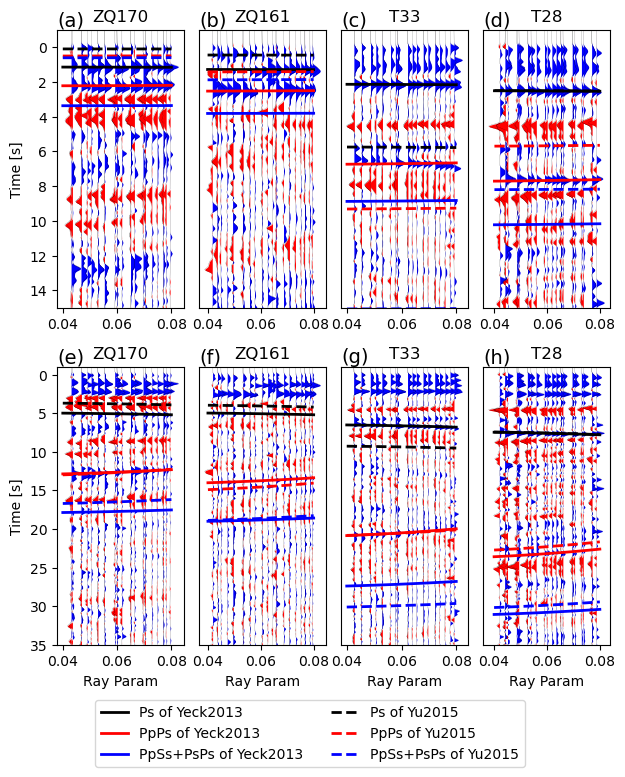

In [14]:
from matplotlib.pyplot import tight_layout
RFmaindir = "seismic_data_RFAC"
phasestackparams=[0.04,0.08,0.0015,0.0025,0]
ray_params = np.linspace(0.04,0.08,51)
stationnames = ["ZQ_170","ZQ_161","TASTE_T33","TASTE_T28"]
stationname_labels = ["ZQ170","ZQ161","T33","T28"]
fig, axs = plt.subplots(2,4,figsize=(16/2.54,18/2.54),tight_layout=True)
plt.rcParams.update({'font.size':10})

vpsdic = {
    "ZQ_170":(3.5, 6.27),
    "ZQ_161":(3.5, 6.27),
    "TASTE_T33":(3, 6.36),
    "TASTE_T28":(3,6.36)
}

labels=[["(a)","(b)","(c)","(d)"],
        ["(e)","(f)","(g)","(h)"]]


for i,stationname in enumerate(stationnames):
    RFdatadir = f"{RFmaindir}/{stationname}"
    stream_rf5 = read(f"{RFdatadir}/*.BHR.sac_g5")
    stream_rf7 = read(f"{RFdatadir}/*.BHR.sac_g7")
    stream_rf5_stack = phase_stacking(stream_rf5,phasestackparams)
    stream_rf7_stack = phase_stacking(stream_rf7,phasestackparams)
    plot_RF_rayp(axs[0,i],stream_rf7_stack,5,-1,15,scale=0.003)
    plot_RF_rayp(axs[1,i],stream_rf5_stack,5,-1,35,scale=0.003)

    # if i==3:
    #     file_RFAC2layer = f"Hkresults_3layer_2sedi/{stationname}/{stationname}_Hk_result.dat"
    #     data_RFAC2layer = np.loadtxt(file_RFAC2layer,skiprows=1)
    #     Hs1_RFAC2layer = data_RFAC2layer[0,1]
    #     Ks1_RFAC2layer = data_RFAC2layer[0,2]
    #     Hs2_RFAC2layer = data_RFAC2layer[1,1]
    #     Ks2_RFAC2layer = data_RFAC2layer[1,2]
    #     Hm_RFAC2layer = data_RFAC2layer[2,1]
    #     Km_RFAC2layer = data_RFAC2layer[2,2]
    #     Vps, Vps1, Vpm = vpsdic[stationname]
    #     tpis_RFAC2layer = Hs1_RFAC2layer*((Ks1_RFAC2layer**2/Vps**2-ray_params**2)**(1/2)-(1/Vps**2-ray_params**2)**(1/2))
    #     tpbs_RFAC2layer = Hs2_RFAC2layer*((Ks2_RFAC2layer**2/Vps1**2-ray_params**2)**(1/2)-(1/Vps1**2-ray_params**2)**(1/2)) + tpis_RFAC2layer
    #     tpms_RFAC2layer = Hm_RFAC2layer*((Km_RFAC2layer**2/Vpm**2-ray_params**2)**(1/2)-(1/Vpm**2-ray_params**2)**(1/2)) + tpbs_RFAC2layer

    #     tpPpis_RFAC2layer = Hs1_RFAC2layer*((Ks1_RFAC2layer**2/Vps**2-ray_params**2)**(1/2)+(1/Vps**2-ray_params**2)**(1/2))
    #     tpPpbs_RFAC2layer = Hs2_RFAC2layer*((Ks2_RFAC2layer**2/Vps1**2-ray_params**2)**(1/2)+(1/Vps1**2-ray_params**2)**(1/2)) + tpPpis_RFAC2layer
    #     tpPpms_RFAC2layer = Hm_RFAC2layer*((Km_RFAC2layer**2/Vpm**2-ray_params**2)**(1/2)+(1/Vpm**2-ray_params**2)**(1/2)) + tpPpbs_RFAC2layer




    # else:
    #     file_RFAC2layer = f"Hk_RFAC2layer/{stationname}/{stationname}_Hk_result.dat"
    #     data_RFAC2layer = np.loadtxt(file_RFAC2layer,skiprows=1)
    #     Hs_RFAC2layer = data_RFAC2layer[0,1]
    #     Ks_RFAC2layer = data_RFAC2layer[0,2]
    #     Hm_RFAC2layer = data_RFAC2layer[1,1]
    #     Km_RFAC2layer = data_RFAC2layer[1,2]
    #     Vps, Vpm = vpsdic[stationname]
    #     tpbs_RFAC2layer = Hs_RFAC2layer*((Ks_RFAC2layer**2/Vps**2-ray_params**2)**(1/2)-(1/Vps**2-ray_params**2)**(1/2))
    #     tpms_RFAC2layer = Hm_RFAC2layer*((Km_RFAC2layer**2/Vpm**2-ray_params**2)**(1/2)-(1/Vpm**2-ray_params**2)**(1/2)) + tpbs_RFAC2layer

    Vps, Vpm = vpsdic[stationname]
    file_RF2layer = f"Hk_RF2layer/{stationname}/{stationname}_Hk_result.dat"
    data_RF2layer = np.loadtxt(file_RF2layer,skiprows=1)
    Hs_RF2layer = data_RF2layer[0,1]
    Ks_RF2layer = data_RF2layer[0,2]
    Hm_RF2layer = data_RF2layer[1,1]
    Km_RF2layer = data_RF2layer[1,2]
    tPbs_RF2layer = Hs_RF2layer*((Ks_RF2layer**2/Vps**2-ray_params**2)**(1/2)-(1/Vps**2-ray_params**2)**(1/2))
    tPms_RF2layer = Hm_RF2layer*((Km_RF2layer**2/Vpm**2-ray_params**2)**(1/2)-(1/Vpm**2-ray_params**2)**(1/2)) + tPbs_RF2layer

    axs[0,i].plot(ray_params,tPbs_RF2layer,lw=2,color="black",ls='-',label='Ps of Yeck2013' if i==0 else "")
    axs[1,i].plot(ray_params,tPms_RF2layer,lw=2,color="black",ls='-')


    tPpPbs_RF2layer = Hs_RF2layer*((Ks_RF2layer**2/Vps**2-ray_params**2)**(1/2)+(1/Vps**2-ray_params**2)**(1/2))
    tPpPms_RF2layer = Hm_RF2layer*((Km_RF2layer**2/Vpm**2-ray_params**2)**(1/2)+(1/Vpm**2-ray_params**2)**(1/2)) + tPpPbs_RF2layer

    axs[0,i].plot(ray_params,tPpPbs_RF2layer,lw=2,color="red",ls='-',label='PpPs of Yeck2013' if i==0 else "")
    axs[1,i].plot(ray_params,tPpPms_RF2layer,lw=2,color="red",ls='-')

    tPsPbs_RF2layer = 2*Hs_RF2layer*((Ks_RF2layer**2/Vps**2-ray_params**2)**(1/2))
    tPsPms_RF2layer = 2*Hm_RF2layer*((Km_RF2layer**2/Vpm**2-ray_params**2)**(1/2)) + tPsPbs_RF2layer

    axs[0,i].plot(ray_params,tPsPbs_RF2layer,lw=2,color="blue",ls='-',label='PpSs+PsPs of Yeck2013' if i==0 else "")
    axs[1,i].plot(ray_params,tPsPms_RF2layer,lw=2,color="blue",ls='-')


    file_RF2layer_DeRe = f"Hk_RF2layer_DeRe/{stationname}/{stationname}_Hk_result.dat"
    data_RF2layer_DeRe = np.loadtxt(file_RF2layer_DeRe,skiprows=1)
    Hs_RF2layer_DeRe = data_RF2layer_DeRe[1,1]
    Ks_RF2layer_DeRe = data_RF2layer_DeRe[1,2]
    Hm_RF2layer_DeRe = data_RF2layer_DeRe[0,1]
    Km_RF2layer_DeRe = data_RF2layer_DeRe[0,2]
    tPbs_RF2layer_DeRe = Hs_RF2layer_DeRe*((Ks_RF2layer_DeRe**2/Vps**2-ray_params**2)**(1/2)-(1/Vps**2-ray_params**2)**(1/2))
    tPms_RF2layer_DeRe = Hm_RF2layer_DeRe*((Km_RF2layer_DeRe**2/Vpm**2-ray_params**2)**(1/2)-(1/Vpm**2-ray_params**2)**(1/2)) + tPbs_RF2layer_DeRe
    axs[0,i].plot(ray_params,tPbs_RF2layer_DeRe,lw=2,color="black",ls='--',label='Ps of Yu2015' if i==0 else "")
    axs[1,i].plot(ray_params,tPms_RF2layer_DeRe,lw=2,color="black",ls='--')

    tPpPbs_RF2layer_DeRe = Hs_RF2layer_DeRe*((Ks_RF2layer_DeRe**2/Vps**2-ray_params**2)**(1/2)+(1/Vps**2-ray_params**2)**(1/2))
    tPpPms_RF2layer_DeRe = Hm_RF2layer_DeRe*((Km_RF2layer_DeRe**2/Vpm**2-ray_params**2)**(1/2)+(1/Vpm**2-ray_params**2)**(1/2)) + tPpPbs_RF2layer_DeRe
    axs[0,i].plot(ray_params,tPpPbs_RF2layer_DeRe,lw=2,color="red",ls='--',label='PpPs of Yu2015' if i==0 else "")
    axs[1,i].plot(ray_params, tPpPms_RF2layer_DeRe,lw=2,color="red",ls='--')

    tPpSbs_RF2layer_DeRe = 2*Hs_RF2layer_DeRe*((Ks_RF2layer_DeRe**2/Vps**2-ray_params**2)**(1/2))
    tPpSms_RF2layer_DeRe = 2*Hm_RF2layer_DeRe*((Km_RF2layer_DeRe**2/Vpm**2-ray_params**2)**(1/2)) + tPpSbs_RF2layer_DeRe
    axs[0,i].plot(ray_params,tPpSbs_RF2layer_DeRe,lw=2,color="blue",ls='--',label='PpSs+PsPs of Yu2015' if i==0 else "")
    axs[1,i].plot(ray_params,tPpSms_RF2layer_DeRe,lw=2,color="blue",ls='--')

    axs[0,i].invert_yaxis()
    axs[1,i].invert_yaxis()
    if i==0:
        axs[0,i].set_ylabel("Time [s]")
        axs[1,i].set_ylabel("Time [s]")
    else:
        axs[0,i].set_yticks([])
        axs[1,i].set_yticks([])
    axs[1,i].set_xlabel("Ray Param")
    axs[0,i].set_ylim(-1,15)
    axs[1,i].set_ylim(-1,35)
    axs[0,i].invert_yaxis()
    axs[1,i].invert_yaxis()
    axs[0,i].set_title(stationname_labels[i])
    axs[1,i].set_title(stationname_labels[i])
    xmin,xmax = axs[0,i].get_xlim()
    ymin,ymax = axs[0,i].get_ylim()
    axs[0,i].text(xmin,ymax,labels[0][i],fontsize=14,verticalalignment='bottom',horizontalalignment='left')

    xmin,xmax = axs[1,i].get_xlim()
    ymin,ymax = axs[1,i].get_ylim()
    axs[1,i].text(xmin,ymax,labels[1][i],fontsize=14,verticalalignment='bottom',horizontalalignment='left')
fig.legend(loc='lower center',bbox_to_anchor=[0.5,-0.1],ncols=2)
plt.savefig("RFs_phasefit_RF2layer_RF2layer_ReDe.jpg",dpi=900,bbox_inches='tight')
plt.show()
    